In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [205]:
df_full = pd.read_csv('pisa2012.csv', encoding='latin-1')

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [206]:
df_columns = pd.read_csv('pisadict2012_columns.csv', encoding='latin-1')

In [207]:
df_sample = df_full.sample(n = 1000)

In [208]:
df_sample.dtypes;

### Univariate Analysis

**What percentage of students have skipped at least one day of school?**

In [222]:
df_full['ST09Q01'].value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: ST09Q01, dtype: int64

In [223]:
df_full['ST09Q01'].value_counts().index

Index(['None  ', 'One or two times  ', 'Three or four times  ',
       'Five or more times  '],
      dtype='object')

In [224]:
df_full['ST09Q01'].isnull().sum();

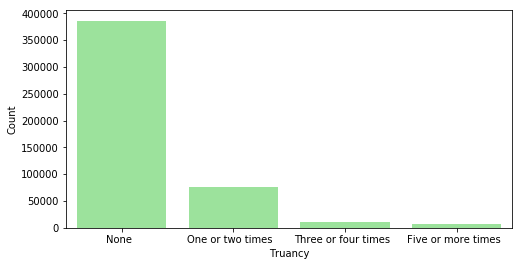

In [225]:
plt.figure(figsize=(8,4))
sb.countplot(data = df_full, x = 'ST09Q01', order = df_full['ST09Q01'].value_counts().index,
            color = 'lightgreen', )
plt.xlabel('Truancy')
plt.ylabel('Count');

**What percentage of students have both parents living at home?**

In [226]:
df_full['ST11Q01'].value_counts()

Yes    433007
No      27552
Name: ST11Q01, dtype: int64

In [227]:
df_full['ST11Q01'].isnull().sum()

24931

In [228]:
df_full['ST11Q02'].value_counts();

In [229]:
df_full['ST11Q02'].isnull().sum()

44454

In [230]:
df_full_q2 = df_full.dropna(subset=['ST11Q02', 'ST11Q01'])

In [231]:
df_full_q2['ST11Q01'].isnull().sum()

0

In [232]:
df_full_q2['ST11Q01'] = df_full_q2['ST11Q01'].map({'Yes': 1, 'No': 0})
df_full_q2['ST11Q02'] = df_full_q2['ST11Q02'].map({'Yes': 1, 'No': 0})
df_full_q2['parents_at_home'] = df_full_q2['ST11Q01'] + df_full_q2['ST11Q02'];

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

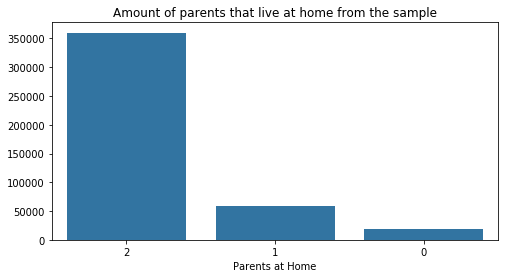

In [233]:
plt.figure(figsize=(8,4))
sb.countplot(data = df_full_q2, x = 'parents_at_home', order = df_full_q2['parents_at_home'].value_counts().index,
            color = sb.color_palette()[0])
plt.xlabel('Parents at Home')
plt.ylabel('')
plt.title('Amount of parents that live at home from the sample');

**Are students usually late for school?**

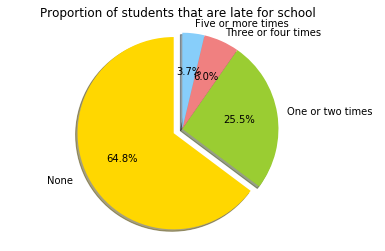

In [234]:
labels = df_full_q2['ST08Q01'].value_counts().index
sizes = df_full_q2['ST08Q01'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.title('Proportion of students that are late for school')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show();

**Is the overall score unimodally distributed simiarly to IQ?**

In [235]:
df_full['PV1MATH'].value_counts();

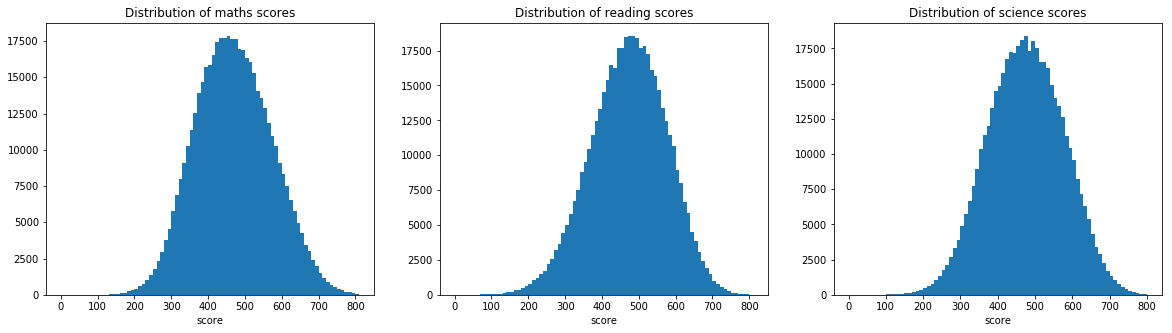

In [236]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.title('Distribution of scores')

# left plot: violin plot


plt.subplot(1, 3, 1)
bin_edges_1 = np.arange(0, df_sample['PV1MATH'].max()+1, 10)
plt.hist(data = df_full, x = 'PV1MATH', bins = bin_edges_1)
plt.xlabel('score')
plt.title('Distribution of maths scores')
;

# middle plot: box plot
plt.subplot(1, 3, 2)
bin_edges_2 = np.arange(0, df_sample['PV1READ'].max()+1, 10)
plt.hist(data = df_full, x = 'PV1READ', bins = bin_edges_2)
plt.xlabel('score')
plt.title('Distribution of reading scores');

plt.subplot(1, 3, 3)
bin_edges_3 = np.arange(0, df_sample['PV1SCIE'].max()+1, 10)
plt.hist(data = df_full, x = 'PV1SCIE', bins = bin_edges_3)
plt.xlabel('score')
plt.title('Distribution of science scores');

### Bivariate Analysis

Does the amount of parents at home affect a childs likeliness to be late to school?

In [238]:
bar0_subset = df_full_q2.query('parents_at_home == 0')
bar1_subset = df_full_q2.query('parents_at_home == 1')
bar2_subset = df_full_q2.query('parents_at_home == 2')

In [239]:
bar0_percentages = bar0_subset['ST08Q01'].value_counts().div(len(bar0_subset['ST08Q01']))

In [240]:
bar1_percentages = bar1_subset['ST08Q01'].value_counts().div(len(bar1_subset['ST08Q01']))

In [241]:
bar2_percentages = bar2_subset['ST08Q01'].value_counts().div(len(bar2_subset['ST08Q01']))

In [242]:
bar_percentages = pd.concat([bar0_percentages, bar1_percentages, bar2_percentages], axis=1, sort=False)
bar_percentages.columns = ['0_parents', '1_parent', '2_parents']
bar_percentages

,0_parents,1_parent,2_parents
None,0.593195,0.581817,0.658195
One or two times,0.279289,0.284601,0.248256
Three or four times,0.068964,0.078127,0.056119
Five or more times,0.052541,0.051009,0.033886


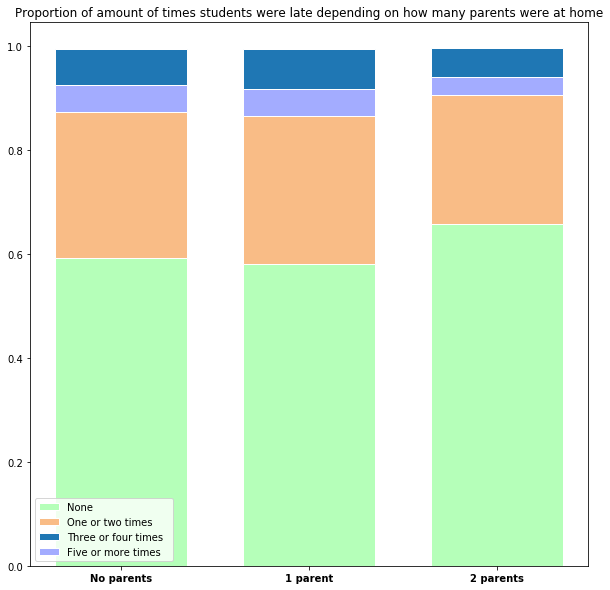

In [243]:
plt.figure(figsize=(10,10))
r = [0,1,2]
bars_1 = np.add(bar_percentages.iloc[0], bar_percentages.iloc[1]).tolist()
bars_2 = np.add(bar_percentages.iloc[3], bars_1).tolist()
names = ['No parents','1 parent','2 parents']
barWidth = 0.7
# Create green Bars
plt.bar(r, bar_percentages.iloc[0], color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, bar_percentages.iloc[1], bottom=bar_percentages.iloc[0], color='#f9bc86', edgecolor='white', width=barWidth)
# Create purple Bars
plt.bar(r, bar_percentages.iloc[2], bottom=bars_2, edgecolor='white', width=barWidth)
# Create dark blue Bars
plt.bar(r, bar_percentages.iloc[3], bottom=bars_1, color='#a3acff', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.legend(bar_percentages.index)
plt.title('Proportion of amount of times students were late depending on how many parents were at home')
# Show graphic
plt.show();

**Does the presence of parents that both live at home affect the overall math score?**

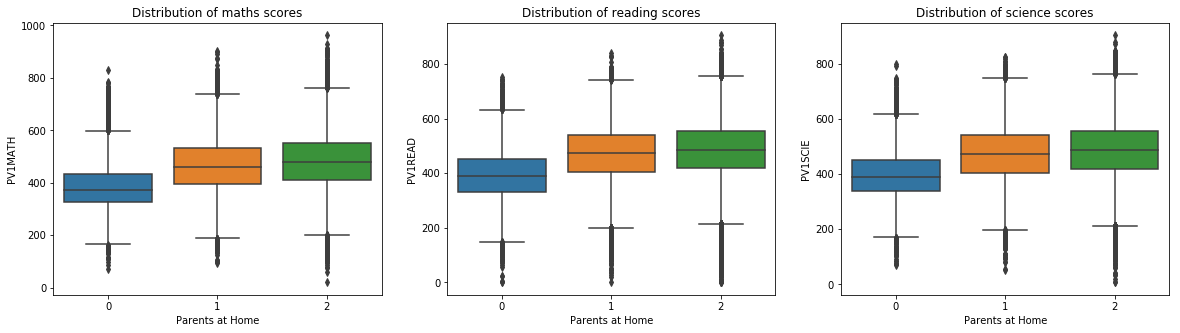

In [244]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.title('Distribution of scores')

# left plot: violin plot
plt.subplot(1, 3, 1)
ax = sb.boxplot(x='parents_at_home', y='PV1MATH', data=df_full_q2)
plt.xlabel('Parents at Home')
plt.title('Distribution of maths scores');

# middle plot: box plot
plt.subplot(1, 3, 2)
ax = sb.boxplot(x='parents_at_home', y='PV1READ', data=df_full_q2)
plt.xlabel('Parents at Home')
plt.title('Distribution of reading scores');

plt.subplot(1, 3, 3)
ax = sb.boxplot(x='parents_at_home', y='PV1SCIE', data=df_full_q2)
plt.xlabel('Parents at Home')
plt.title('Distribution of science scores');

**Do children, who are never late, score higher?**

In [245]:
df_full['ST09Q01'].value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: ST09Q01, dtype: int64

In [247]:
never_late = df_full['ST09Q01'].value_counts().index[:1]
late = df_full['ST09Q01'].value_counts().index[1:4]
df_late = df_full.loc[df_full['ST09Q01'].isin(late)]
df_never_late = df_full.loc[df_full['ST09Q01'].isin(never_late)]

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


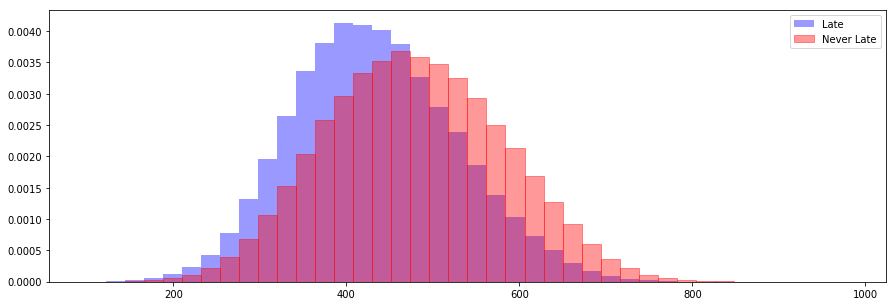

In [248]:
fig = plt.figure(figsize = [15, 5])
ax = fig.add_subplot(111)

ax.hist(data = df_late, x = df_late['PV1MATH'], bins = np.arange(100, 1000, 22), normed=True, edgecolor='None', alpha = 0.4, color= 'b')
ax.hist(data = df_never_late, x = df_never_late['PV1MATH'], bins = np.arange(100, 1000, 22), normed=True, edgecolor='r', alpha = 0.4, color= 'r')
ax.legend(['Late', 'Never Late'])
plt.show();


**Are children with siblings more or less likely to score higher?**

In [249]:
df_full['ST11Q03'].value_counts()

Yes    245262
No     154814
Name: ST11Q03, dtype: int64

In [250]:
df_full['ST11Q04'].value_counts()

Yes    223061
No     167707
Name: ST11Q04, dtype: int64

In [251]:
df_full.shape[0]

485490

In [252]:
siblings = []

for i in range(df_full.shape[0]):
    if df_full['ST11Q03'][i] == "Yes":
        siblings.append(1)
    elif df_full['ST11Q04'][i] == "Yes":
        siblings.append(1)
    else: 
        siblings.append(0)

In [253]:
df_full['siblings'] = siblings

In [257]:
siblings = ['1']
nosiblings = ['0']
df_w_siblings = df_full.loc[df_full['siblings'].isin(siblings)]
df_wo_siblings = df_full.loc[df_full['siblings'].isin(nosiblings)]

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


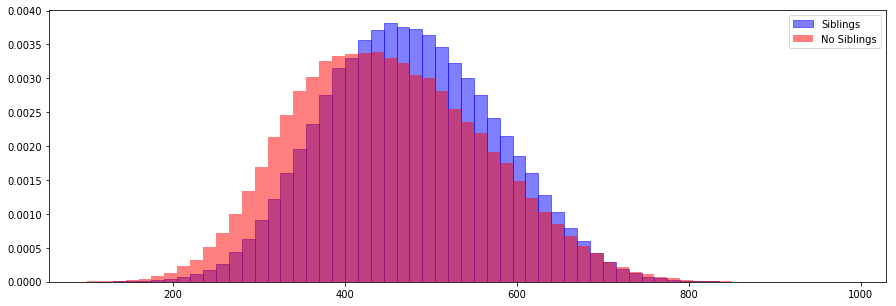

In [258]:
fig = plt.figure(figsize = [15, 5])

ax = fig.add_subplot(111)
ax.hist(data = df_w_siblings, x = df_w_siblings['PV1MATH'], bins = np.arange(100, 1000, 15), normed=True, edgecolor='b', alpha = 0.5, color= 'b')
ax.hist(data = df_wo_siblings, x = df_wo_siblings['PV1MATH'], bins = np.arange(100, 1000, 15), normed=True, edgecolor='None', alpha = 0.5, color= 'r')
ax.legend(['Siblings', 'No Siblings'])
plt.show();

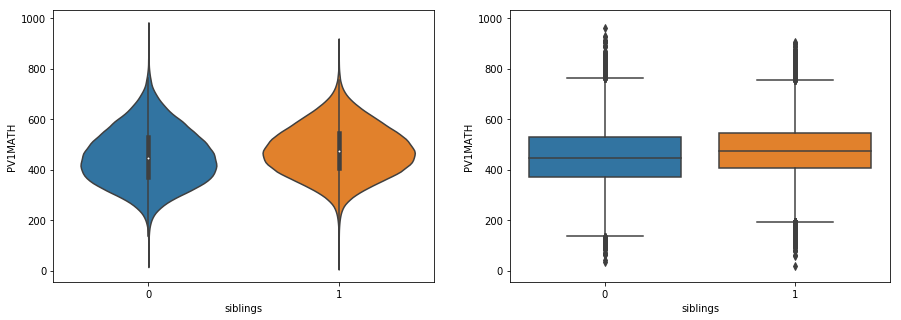

In [259]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_full, x = df_full['siblings'], y = 'PV1MATH')

# center plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_full, x = df_full['siblings'], y = 'PV1MATH')
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

**Is there a relationship between Mathematics and Science Scores?**

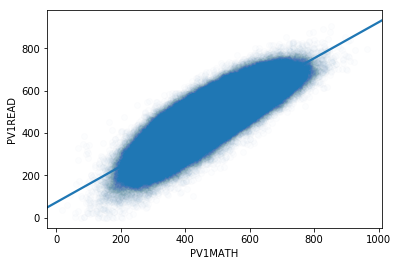

In [260]:
sb.regplot(data = df_full, x = 'PV1MATH', y = 'PV1READ', 
           x_jitter = 0.2, y_jitter = 0.2, 
           scatter_kws = {'alpha' : 1/100});

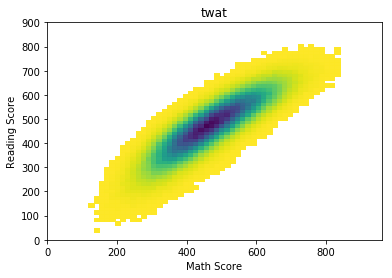

In [294]:
bin_PV1MATH = np.arange(0, df_full['PV1MATH'].max(), 15)
bin_PV2READ   = np.arange(0, df_full['PV1READ'].max(), 15)

h2d = plt.hist2d(data = df_full, x = 'PV1MATH', y = 'PV1READ', 
          bins = [bin_PV1MATH, bin_PV2READ], cmap = 'viridis_r', cmin = 5, alpha = 0.99)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('twat')
counts = h2d[0]

### Multivariate Analysis

**What, if any, does the influence of having both parents living at home appear to have on reading ability and mathematical ability?**

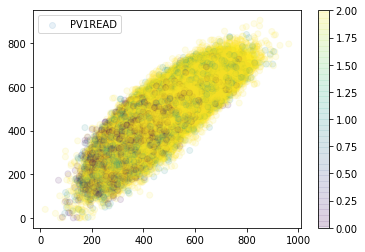

In [296]:
plt.scatter(data = df_full_q2, x = 'PV1MATH', y = 'PV1READ', c = 'parents_at_home', alpha = 0.1)
plt.colorbar()
plt.legend();

**Does the presence of having both parents living at home create a difference in mathematical ability and literacy ability? Does this difference appear to increase or decrease if both parents are not living at home?**

In [264]:
df_full_q2['MATH_READ_diff'] = df_full_q2['PV1MATH'] - df_full_q2['PV1READ']
df_full_q2['MATH_SCIE_diff'] = df_full_q2['PV1MATH'] - df_full_q2['PV1SCIE']
df_full_q2['SCIE_READ_diff'] = df_full_q2['PV1SCIE'] - df_full_q2['PV1READ']

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

'# set y-axis limits to be same as left plot'

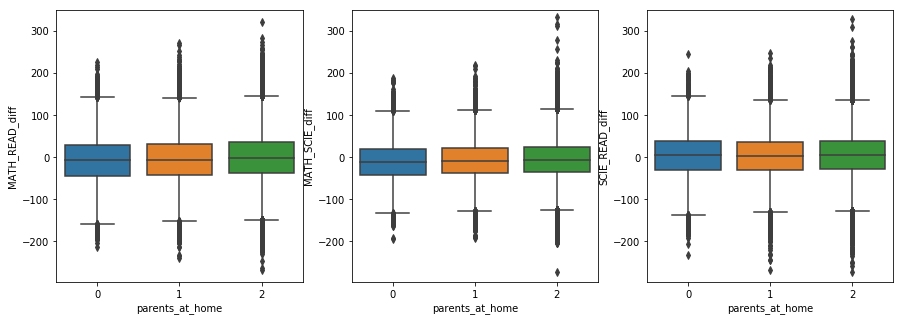

In [265]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot( x = "parents_at_home", y = "MATH_READ_diff", data=df_full_q2)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot( x = "parents_at_home", y = "MATH_SCIE_diff", data=df_full_q2)
plt.ylim(ax1.get_ylim())

plt.subplot(1, 3, 3)
sb.boxplot( x = "parents_at_home", y = "SCIE_READ_diff", data=df_full_q2)
plt.ylim(ax1.get_ylim())
; # set y-axis limits to be same as left plot

**What is the relationship between literacy scores and mathematical abilities between genders?**

In [273]:
import statsmodels.api as sm

In [283]:
X_boy = df_full_q2[df_full_q2['ST04Q01'] == 'Male']['PV1MATH']
Y_boy = df_full_q2[df_full_q2['ST04Q01'] == 'Male']['PV1READ']

results_boy = sm.OLS(Y_boy,sm.add_constant(X_boy)).fit()
results_boy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 7.835e+05
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:53:02   Log-Likelihood:            -1.1420e+06
No. Observations:              216089   AIC:                         2.284e+06
Df Residuals:                  216087   BIC:                         2.284e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5932      0.487     81.370      0.000      38.640      40.547
PV1MATH        0.8729      0.001    885.156      0.000       0.871       0.875
==============================================================================
Omnibus:                     1388.373   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1639.750
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                       3.326   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [287]:
X_girl = df_full_q2[df_full_q2['ST04Q01'] == 'Female']['PV1MATH']
Y_girl = df_full_q2[df_full_q2['ST04Q01'] == 'Female']['PV1READ']

results_girl = sm.OLS(Y_girl,sm.add_constant(X_girl)).fit()
results_girl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 6.912e+05
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:09:29   Log-Likelihood:            -1.1612e+06
No. Observations:              220811   AIC:                         2.322e+06
Df Residuals:                  220809   BIC:                         2.322e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.4833      0.481    215.150      0.000     102.541     104.426
PV1MATH        0.8330      0.001    831.401      0.000       0.831       0.835
==============================================================================
Omnibus:                     1973.412   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2490.469
Skew:                          -0.152   Prob(JB):                         0.00
Kurtosis:                       3.422   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
results_boy.params[1]

0.8728637829624247

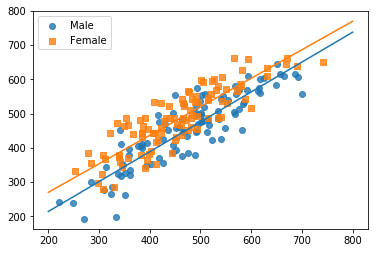

In [288]:
gender_markers = [["Male", 'o'],
                 ["Female", 's']]

for sex, gender in gender_markers:
    df_full_plot = df_full_q2[df_full_q2['ST04Q01'] == sex]
    X_plot = plt.scatter(data = df_full_plot.sample(n=100), y = 'PV1READ', x = 'PV1MATH', marker = gender, alpha = 0.8)
plt.legend(['Male','Female'])
plt.plot([200, 800], [214.1732, 737.9132])
plt.plot([200, 800], [270.0833, 769.8833])

